Finding dE/dx separation using Bruno's reco data.

In [21]:
import pandas as pd
import numpy as np
import uproot
import awkward as ak 
import matplotlib.pyplot as plt

from collections import Counter

In [22]:
ROOT = '/Users/user/data/research/proton-deuteron/bruno/root/MergedAnaTree_Run2_Beam_Pos100A_2022_01.root'
DEUTERONS = '/Users/user/data/research/proton-deuteron/csv/l5.pkl'

In [23]:
d = pd.read_pickle(DEUTERONS)

In [24]:
file = uproot.open(ROOT)
file.keys(), file.classnames()

(['anatree;1', 'anatree/anatree;883', 'anatree/anatree;882'],
 {'anatree;1': 'TDirectory',
  'anatree/anatree;883': 'TTree',
  'anatree/anatree;882': 'TTree'})

In [25]:
tree = file["anatree/anatree;883"]
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
subrun               | int32_t                  | AsDtype('>i4')
event                | int32_t                  | AsDtype('>i4')
evttime              | double                   | AsDtype('>f8')
efield               | float                    | AsDtype('>f4')
lifetime             | float                    | AsDtype('>f4')
t0                   | int32_t                  | AsDtype('>i4')
nclus                | int32_t                  | AsDtype('>i4')
clustertwire         | float[]                  | AsJagged(AsDtype('>f4'))
clusterttick         | float[]                  | AsJagged(AsDtype('>f4'))
cluendwire           | float[]                  | AsJagged(AsDtype('>f4'))
cluendtick           | float[]                  | AsJagged(AsDtype('>f4'))
cluplane          

In [26]:
data = tree.arrays(['run', 'subrun', 'event'], library='pd'); data

,run,subrun,event
0,8675,12,1249
1,8675,12,1250
2,8675,12,1256
3,8675,12,1257
4,8675,12,1258
...,...,...,...
580633,9781,133,21593
580634,9781,133,21596
580635,9781,133,21614
580636,9781,133,21621


In [27]:
event = data.query('run == 9485 and subrun == 178 and event == 13363'); event

,run,subrun,event
306610,9485,178,13363


In [28]:
clusters = tree.arrays(["hit_trkid"], library='pd'); clusters
signal = clusters.iloc[306610]

print(signal.iloc[0].to_numpy())

[ 4  4  4 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9  1  1  1  1  1 -9
 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  4  4  4  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -9  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  5  5  5  5  5  5  5  5 -9 -9 -9  2
  2  2  2  2 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9 -9

In [29]:
clusters = tree.arrays(['clustertwire', 'clusterttick', 'cluendwire', "cluendtick", "cluplane"], library='pd'); clusters
signal = clusters.iloc[306610]

print(signal.iloc[0], signal.iloc[2], signal.iloc[4])

[49, 51, 72, 124, 149, 216, 75, 91, ..., 104, 128, 75, 117, 27, 31, 116, 96] [51, 53, 74, 126, 151, 218, 74, 90, ..., 102, 120, 89, 140, 30, 34, 118, 100] [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ..., 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


In [30]:
signal.iloc[0].to_numpy()

array([ 49.        ,  51.        ,  72.        , 124.        ,
       149.        , 216.        ,  75.        ,  91.        ,
       140.        , 130.        , 178.        , 180.        ,
        90.        ,  97.99958038, 138.        , 174.        ,
        54.        ,  63.        , 104.        , 128.        ,
        75.        , 117.        ,  27.        ,  31.        ,
       116.        ,  96.        ])

In [31]:
signal.iloc[2].to_numpy()

array([ 51.        ,  53.        ,  74.        , 125.99524689,
       150.99966431, 218.        ,  74.        ,  90.        ,
       139.        , 132.        , 186.        , 179.        ,
       114.99723816, 129.        , 102.        , 129.        ,
        91.        ,  95.        , 102.        , 120.        ,
        89.        , 140.        ,  30.00037956,  34.        ,
       117.99997711, 100.00260925])

In [32]:
np.where(signal.iloc[0].to_numpy() == 27)

(array([22]),)

In [33]:
i = 22
c = [(signal.iloc[0][i], signal.iloc[2][i]), (signal.iloc[1][i], signal.iloc[3][i])]
plane = signal['cluplane'][22]

In [34]:
c, plane

([(np.float64(27.0), np.float64(30.00037956237793)),
  (np.float64(1160.79541015625), np.float64(1156.048095703125))],
 np.float64(0.0))

In [35]:
signal

clustertwire    [49.0 51.0 72.0 124.0 149.0 216.0 75.0 91.0 14...
clusterttick    [1188.3914794921875 1145.62646484375 3069.8168...
cluendwire      [51.0 53.0 74.0 125.99524688720703 150.9996643...
cluendtick      [1166.9981689453125 1095.419189453125 3034.021...
cluplane        [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1...
Name: 306610, dtype: awkward

In [36]:
signal = pd.DataFrame({
    'clustertwire': signal['clustertwire'],
    'clusterttick': signal['clusterttick'], 
    'cluendwire': signal['cluendwire'],
    'cluendtick': signal['cluendtick'],
    'cluplane': signal['cluplane'],
})

signal

,clustertwire,clusterttick,cluendwire,cluendtick,cluplane
0,49.00000,1188.391479,51.000000,1166.998169,0.0
1,51.00000,1145.626465,53.000000,1095.419189,0.0
2,72.00000,3069.816895,74.000000,3034.021240,0.0
3,124.00000,425.244781,125.995247,432.184296,0.0
4,149.00000,1.727867,150.999664,1.470207,0.0
5,216.00000,699.751953,218.000000,699.142761,0.0
6,75.00000,2944.410156,74.000000,3007.659912,0.0
7,91.00000,2184.283203,90.000000,2220.314209,0.0
8,140.00000,387.371002,139.000000,338.157684,0.0
9,130.00000,2567.040527,132.000000,2489.837891,1.0


In [37]:
coll = signal[signal['cluplane'] == 0.0]
coll

,clustertwire,clusterttick,cluendwire,cluendtick,cluplane
0,49.0,1188.391479,51.000000,1166.998169,0.0
1,51.0,1145.626465,53.000000,1095.419189,0.0
2,72.0,3069.816895,74.000000,3034.021240,0.0
3,124.0,425.244781,125.995247,432.184296,0.0
4,149.0,1.727867,150.999664,1.470207,0.0
5,216.0,699.751953,218.000000,699.142761,0.0
6,75.0,2944.410156,74.000000,3007.659912,0.0
7,91.0,2184.283203,90.000000,2220.314209,0.0
8,140.0,387.371002,139.000000,338.157684,0.0
12,90.0,91.872467,114.997238,1.363559,0.0


In [38]:
[26, 35, 1134, 1277]

[26, 35, 1134, 1277]

Cluster 22

In [39]:
trk = tree.arrays(['trkdedx', 'trkrr'], library='pd', entry_start=306610, entry_stop=306611)

In [40]:
trk

,trkdedx,trkrr
306610,[[[3.377856731414795 4.484511852264404 2.08391...,[[[22.587568283081055 22.06871223449707 21.483...


In [41]:
dEdx = trk['trkdedx'].to_numpy()
dEdx.shape

(1, 6, 2, 1000)

In [42]:
branches = [
    "nclus",
    "clustertwire", "cluendwire",
    "clusterttick", "cluendtick",
    "cluplane",

    "nhits",
    "hit_plane", "hit_wire",
    "hit_peakT",         
    "hit_trkid"
]

evt_idx = 306_610                            

arrays = tree.arrays(
    branches,
    entry_start=evt_idx,       
    entry_stop =evt_idx + 1,  
    library="ak"
)

n_evt = len(arrays["nclus"])

evt = 0

nclus = arrays["nclus"][evt]
pl    = arrays["cluplane"][evt]         
w0    = arrays["clustertwire"][evt]
w1    = arrays["cluendwire"][evt]
t0    = arrays["clusterttick"][evt]
t1    = arrays["cluendtick"][evt]


nhits   = arrays["nhits"][evt]
hpl     = arrays["hit_plane"][evt][:nhits]      
hwire   = arrays["hit_wire"][evt][:nhits]
htick   = arrays["hit_peakT"][evt][:nhits]
htkid   = arrays["hit_trkid"][evt][:nhits]

for iclu in range(nclus):

    plane = pl[iclu]
    lo_w, hi_w = sorted((w0[iclu], w1[iclu]))
    lo_t, hi_t = sorted((t0[iclu], t1[iclu]))

    mask = (
        (hpl   == plane) &
        (hwire >= lo_w)  & (hwire <= hi_w) &
        (htick >= lo_t)  & (htick <= hi_t) &
        (htkid >= 0)
    )

    if not ak.any(mask):
        print(f"evt {evt:4d}  clu {iclu:3d}:  no associated hits")
        continue

    tk_ids  = np.asarray(htkid[mask], dtype=int)
    tk, cnt = np.unique(tk_ids, return_counts=True)
    best_id = tk[np.argmax(cnt)]
    best_n  = cnt.max()

    print(f"evt {evt:4d}  clu {iclu:3d}  plane {plane}:"
            f"  track {best_id}  ({best_n} hits)")

evt    0  clu   0  plane 0:  track 0  (3 hits)
evt    0  clu   1  plane 0:  track 0  (2 hits)
evt    0  clu   2  plane 0:  track 0  (2 hits)
evt    0  clu   3  plane 0:  track 2  (2 hits)
evt    0  clu   4  plane 0:  track 0  (1 hits)
evt    0  clu   5:  no associated hits
evt    0  clu   6  plane 0:  track 0  (5 hits)
evt    0  clu   7  plane 0:  track 3  (3 hits)
evt    0  clu   8  plane 0:  track 0  (4 hits)
evt    0  clu   9  plane 1:  track 1  (2 hits)
evt    0  clu  10  plane 1:  track 2  (5 hits)
evt    0  clu  11  plane 1:  track 2  (3 hits)
evt    0  clu  12  plane 0:  track 3  (16 hits)
evt    0  clu  13  plane 1:  track 5  (2 hits)
evt    0  clu  14  plane 0:  track 2  (19 hits)
evt    0  clu  15  plane 1:  track 2  (19 hits)
evt    0  clu  16  plane 0:  track 0  (25 hits)
evt    0  clu  17:  no associated hits
evt    0  clu  18  plane 0:  track 3  (2 hits)
evt    0  clu  19  plane 1:  track 2  (1 hits)
evt    0  clu  20  plane 0:  track 3  (17 hits)
evt    0  clu  21  plane

In [43]:
merged = data.reset_index().merge(
    d.reset_index()[['index', 'run', 'subrun', 'event', 'bbox_min_row', 'bbox_max_row', 'bbox_min_col', 'bbox_max_col']].rename(columns={'index': 'd_index'}),
    on=['run', 'subrun', 'event'],
    how='inner'
).set_index('index').sort_values('d_index')

merged

,run,subrun,event,d_index,bbox_min_row,bbox_max_row,bbox_min_col,bbox_max_col
index,,,,,,,,
17666,8599,28,2727,0,30,44,894,1014
354349,9515,52,4259,1,19,32,1637,1740
146800,9481,422,34201,2,29,37,1280,1392
188608,8711,11,1759,3,15,29,837,989
516017,8679,69,5978,4,19,33,1285,1408
...,...,...,...,...,...,...,...,...
260522,9548,2,66,838,22,36,1531,1654
318808,9552,63,4648,839,17,23,1346,1443
324914,9553,165,11729,840,22,36,1531,1670


In [59]:
# row = merged.iloc[60]
row = merged.sample(n=1).iloc[0]
i = row.name
i

np.int64(517353)

/var/folders/cm/m55y72dj6cd5lkwrfdb2bpnr0000gp/T/ipykernel_71359/1568409156.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap      = plt.cm.get_cmap("tab10")
/var/folders/cm/m55y72dj6cd5lkwrfdb2bpnr0000gp/T/ipykernel_71359/1568409156.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(wire[mask_tid], tick[mask_tid], c=colors[track_id], s=8, alpha=0.8,


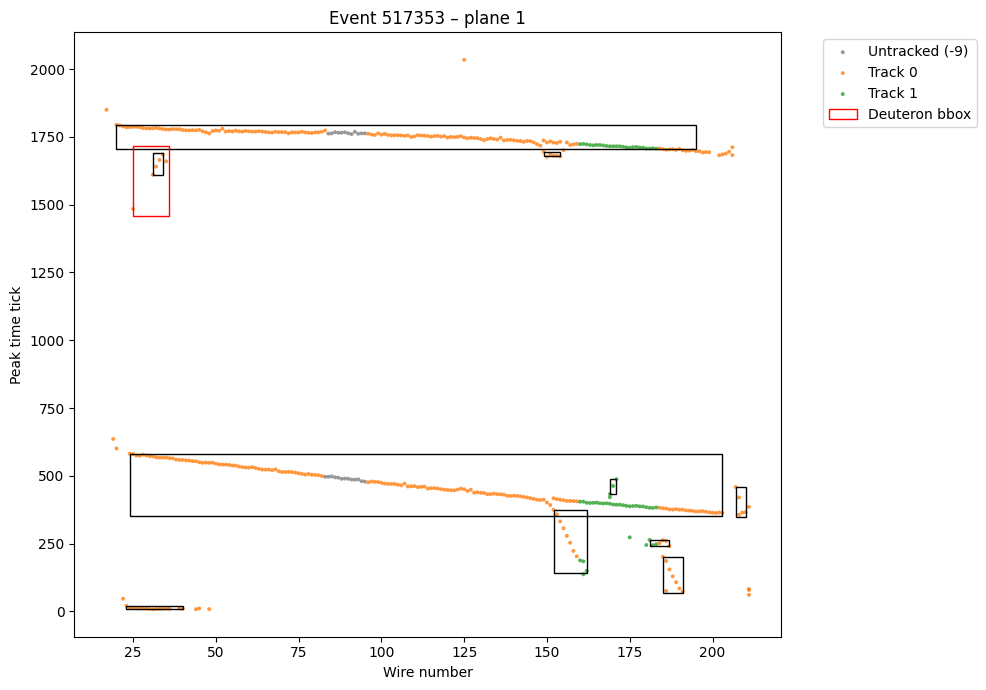

In [60]:
evt_idx = i                                       

branches = [
    "nclus", "cluplane",
    "clustertwire", "cluendwire",
    "clusterttick", "cluendtick",
    
    "nhits",
    "hit_plane", "hit_wire", "hit_peakT",
    "hit_trkid"
]

arrays = tree.arrays(
    branches,
    entry_start = evt_idx,         
    entry_stop  = evt_idx + 1,      
    library     = "ak"
)

evt = 0
plane_to_plot = 1                   # 0 = induction, 1 = = collection

mask_plane = arrays["hit_plane"][evt] == plane_to_plot

wire  = ak.to_numpy(arrays["hit_wire" ][evt][mask_plane])
tick  = ak.to_numpy(arrays["hit_peakT"][evt][mask_plane])
tid   = ak.to_numpy(arrays["hit_trkid"][evt][mask_plane])

uniq_ids  = np.unique(tid)
cmap      = plt.cm.get_cmap("tab10")
colors    = {trk:cmap(i % 10) for i,trk in enumerate(uniq_ids)}
hit_color = [colors[t] for t in tid]

fig, ax = plt.subplots(figsize=(10,7))

# Plot hits with colors
for track_id in uniq_ids:
    mask_tid = tid == track_id
    if track_id < 0:
        # Untracked hits in gray
        ax.scatter(wire[mask_tid], tick[mask_tid], c='gray', s=8, alpha=0.8, 
                  label=f'Untracked ({track_id})', edgecolors="none")
    else:
        # Tracked hits with colors
        ax.scatter(wire[mask_tid], tick[mask_tid], c=colors[track_id], s=8, alpha=0.8, 
                  label=f'Track {track_id}', edgecolors="none")

ax.set_xlabel("Wire number")
ax.set_ylabel("Peak time tick")
ax.set_title(f"Event {evt_idx} – plane {plane_to_plot}")

# Add cluster rectangles
for iclu in range(arrays["nclus"][evt]):
    if arrays["cluplane"][evt][iclu] != plane_to_plot:
        continue
    w0, w1 = arrays["clustertwire"][evt][iclu], arrays["cluendwire"][evt][iclu]
    t0, t1 = arrays["clusterttick"][evt][iclu], arrays["cluendtick"][evt][iclu]
    lo_w, hi_w = sorted((w0, w1))
    lo_t, hi_t = sorted((t0, t1))
    rect = plt.Rectangle(
        (lo_w, lo_t),                   
        hi_w - lo_w,                   
        hi_t - lo_t,                    
        facecolor="none", edgecolor="k", linewidth=1.0
    )
    ax.add_patch(rect)

# Add bbox rectangle
bbox = (row['bbox_min_row'], row['bbox_min_col'], row['bbox_max_row'], row['bbox_max_col'])
bbox_rect = plt.Rectangle(
    (bbox[0], bbox[1]),  # (wire, tick) -> (col, row)
    bbox[2] - bbox[0],   # width in wire
    bbox[3] - bbox[1],   # height in tick
    facecolor="none", edgecolor="red", linewidth=1.0, label="Deuteron bbox"
)
ax.add_patch(bbox_rect)

# Add legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [46]:
def track_calo_from_bbox(root_path, tree_name,
                         event_idx,
                         bbox,             
                         plane=1):
    """
    Parameters
    ----------
    root_path : str            full path to the ROOT file
    tree_name : str            e.g. "anatree"
    event_idx : int            zero-based event row to inspect
    bbox : tuple(float)        (wire_min, tick_min, wire_max, tick_max)
    plane     : int            1 == collection
    
    Returns
    -------
    track_idx : int            index of matched reco track (-1 if none)
    dEdx      : 1-D np.array   MeV/cm for that track/plane
    resrange  : 1-D np.array   residual range (cm), same length as dEdx
    """
    
    branches = [
        "nhits", "hit_plane", "hit_wire", "hit_peakT", "hit_trkid",
        "ntrkcalopts", "trkdedx", "trkrr"
    ]
    
    with uproot.open(root_path) as f:
        tree = f[tree_name]
        arr  = tree.arrays(
            branches,
            entry_start=event_idx,
            entry_stop =event_idx+1,
            library="ak",
        )
    
    evt = 0                      
    
    wire_min, tick_min, wire_max, tick_max = bbox

    h_plane = arr["hit_plane"][evt]
    h_wire  = arr["hit_wire"][evt]
    h_tick  = arr["hit_peakT"][evt]
    h_tid   = arr["hit_trkid"][evt]
    
    plane_mask = (h_plane == plane)
    
    hit_mask_all = (
        plane_mask &
        (h_wire  >= wire_min) & (h_wire <= wire_max) &
        (h_tick  >= tick_min) & (h_tick <= tick_max)
    )

    hit_mask_tracked = hit_mask_all & (h_tid >= 0)

    print("Total hits in event:", len(h_tid))
    print(f"Hits in plane {plane}:", ak.sum(plane_mask))
    print("Hits in bbox:", ak.sum(hit_mask_all))
    print("Tracked hits in bbox:", ak.sum(hit_mask_tracked))
    if ak.any(hit_mask_tracked):
        print("Track IDs in bbox:", np.unique(h_tid[hit_mask_tracked]))

    plane_hits = plane_mask
    valid_in_plane = plane_hits & (h_tid >= 0)
    invalid_in_plane = plane_hits & (h_tid < 0)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(h_wire[valid_in_plane], h_tick[valid_in_plane], 
               c=h_tid[valid_in_plane], cmap="tab10", s=8, label="Track hits")
    plt.scatter(h_wire[invalid_in_plane], h_tick[invalid_in_plane], 
               c="gray", s=2, label="Untracked hits")
    
    plt.axvspan(wire_min, wire_max, alpha=0.2, color='red', label='Bbox region')
    plt.axhspan(tick_min, tick_max, alpha=0.2, color='red')
    
    plt.xlabel("Wire number")
    plt.ylabel("Peak time tick")
    plt.legend()
    plt.title(f"Event {event_idx}, plane {plane}")
    plt.show()

    if not ak.any(hit_mask_tracked):
        return -1, np.array([]), np.array([])

    tids_in_box = np.asarray(h_tid[hit_mask_tracked], dtype=int)
    tids, counts = np.unique(tids_in_box, return_counts=True)
    best_track   = tids[np.argmax(counts)]

    print(f"Best track ID: {best_track} with {counts.max()} hits")
    
    npts = arr["ntrkcalopts"][evt][best_track][plane]
    if npts == 0:
        print(f"No calorimetry points for track {best_track} in plane {plane}")
        return best_track, np.array([]), np.array([])
    
    dEdx = np.asarray(arr["trkdedx"][evt][best_track][plane][:npts])
    rr   = np.asarray(arr["trkrr" ][evt][best_track][plane][:npts])
    
    return best_track, dEdx, rr

Total hits in event: 472
Hits in plane 1: 231
Hits in bbox: 4
Tracked hits in bbox: 4
Track IDs in bbox: [0]


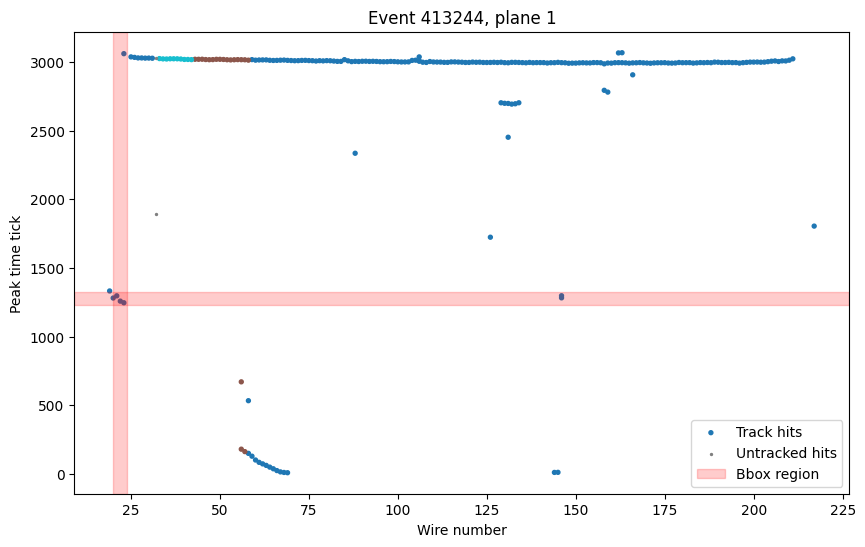

Best track ID: 0 with 4 hits
matched track index: 0
dE/dx  (MeV/cm): [ 2.192848   2.1303546  2.3351882  3.9614134  2.2639399  1.8758615
  2.142518   2.4441078  1.9858536  2.368522   1.849245   1.8407668
  2.4744327  2.8718698  4.6855435  3.0769062  2.44236    1.9895811
  1.825303   2.3283737  3.1435866  2.231496   2.0468843  2.1894052
  5.4924073  2.6017606  2.772211   3.9401991  2.0329978  1.8550782
  2.1831367  2.15815    6.16324    4.190941   1.8261715  2.22196
  2.2509997  2.1469805  2.202655   2.5438924  1.724517   2.1244934
  2.3155475  2.0997531  1.9757003  3.9239323  2.0441039  2.2043078
  2.0577013  2.36458    2.1685417  1.7576504  1.8838288  2.5275767
  2.1623735  2.275864   2.209025   2.2585635  1.8786317  2.2573717
  2.130786   2.2667525  1.8530693  2.0184987  1.9560905  2.1054718
  2.314366   2.2727354  2.0195453  2.0694215  2.130658   2.1369848
  2.682695   5.0452795  1.9254498  1.9485193  3.7199728 10.988229
  6.7133417  2.0001955  1.6804926  1.7703117  2.0714412  2.3251

In [47]:
bbox = (row['bbox_min_row'], row['bbox_min_col'], row['bbox_max_row'], row['bbox_max_col'])   # (min wire, min tick, max wire, max tick)

trk_idx, dEdx, rr = track_calo_from_bbox(
    ROOT,
    "anatree/anatree;883",
    event_idx = i,
    bbox      = bbox,
    plane     = 1
)

print("matched track index:", trk_idx)
print("dE/dx  (MeV/cm):", dEdx)
print("residual range (cm):", rr)

In [48]:
with uproot.open(ROOT) as f:
    tree = f["anatree/anatree;883"]
    lengths = tree["trklength"].array(library="ak")  
    flat_lengths = ak.flatten(lengths)

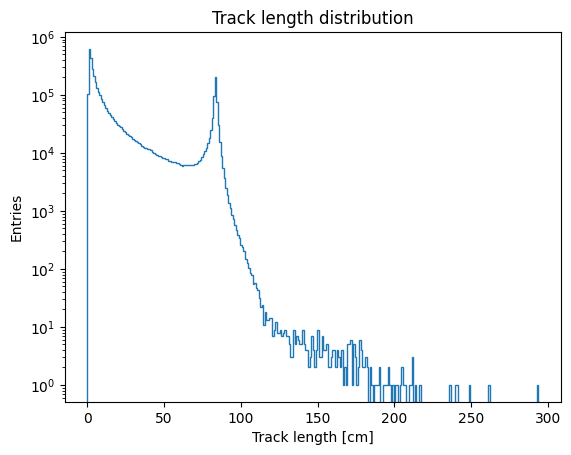

In [49]:
plt.hist(flat_lengths, bins=300, histtype="step")
plt.xlabel("Track length [cm]")
plt.ylabel("Entries")
plt.yscale("log")
plt.title("Track length distribution")
plt.show()